<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Total gender wise participation in Olympics, men vs women](#section401)<br/>
    - 4.2 [Over the years, how has been the trend in winning medals based on gender?](#section402)<br/>
    - 4.3 [How is the performance of India against Top 5 countries?](#section403)<br/>
    - 4.4 [Is India one among the bottom 5 performers?](#section404)<br/>
    - 4.5 [What has been the position of India in the medals table over the years?](#section405)<br/>
    - 4.6 [Performance of India in the Olympics](#section406)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>
## 1. Problem Statement

The performance of __India__ is to be measured. The data under analysis contains the info of players who have won medals, whether it be in Individual or Team event.Based on the data, it is observed that India has under performed in the Olympics!

<a id=section2></a>
## 2. Data Loading and Description
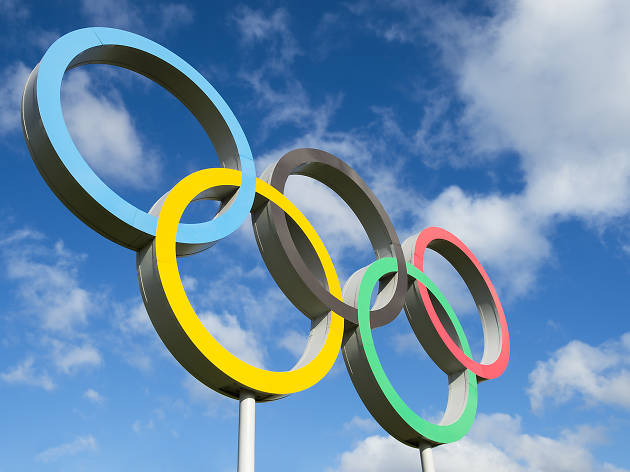

- This dataset is a survey of the medals won at the Olympics held from __1896 to 2012__. 
- The dataset consists of the information about the medals won by atheletes of different countries in different sport discipline
- This dataset gives information of __medals won__ and not the __total participants__ info.
- The dataset comprises of __31163 observations of 9 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Year          | Year the olympics was conductewd                          | 
| City          | City the olympics was conducted                           |  
| Sport         | Sport Name                                                | 
| Discipline    | Different sports under same sport category                |   
| Athlete       | Athlete's name                                            |
| Country       | Country the athlete belongs to                            |
| Gender        | Male or Female                                            |
| Event         | events like 200 m , 400 m,Mixed/Doubles etc               |
| Medal         | Medal name eg; silver, gold etc.                          |


#### Importing packages 

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output


#### Importing the Dataset

In [2]:
oly_data=pd.read_csv("C:/Users/Admin/Documents/Projects/summer olympics.csv",encoding='latin-1')

<a id=section3></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns and also the duplicate rows. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>
### 3.1 Understanding the Dataset

In [3]:
oly_data.shape                                   # This will print the number of rows and comlumns of the Data Frame

(31165, 9)

It is observed that there are __31165 rows__ and __9 columns__.

In [4]:
oly_data.dtypes                             # Display the data type for each column

Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

It is observed that all columns are __object__ type, except Year which is __int64__.

In [5]:
oly_data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
oly_data.describe()                      # Descriptive statistics for the numerical variables

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [7]:
oly_data.isnull().sum()                #Display the null count in all variables

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

It shows that __4__ values are null in Country column, which need to be dealt with.

<a id=section302></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [8]:
profile = pandas_profiling.ProfileReport(oly_data)
profile.to_file(outputfile="olympic_before_preprocessing.html")              # HTML file will be downloaded to our workspace

It is observed that:<br/>

   - There are __null__ values in __Country__ column.
   - There are couple of duplicate rows.

<a id=section303></a>
### 3.3 Preprocessing

Following actions will be taken care of while processing the data<br/>
   - Rows will be deleted for the null values in column __Country__.
   - Duplicate rows will be deleted
   - All the column names will be converted to lower case.
   - A new column will be added to identify if the event is and __Individual__ or __Team__ type.
   

In [9]:
oly_data[oly_data.isnull().any(axis=1)].head() # Four rows had Country as NaN 

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [10]:
oly_data.dropna(inplace=True) #Dropped the rows with null values

In [11]:
oly_data.drop_duplicates(inplace=True) # duplicate records dropped

In [12]:
oly_data.columns = map(str.lower, oly_data.columns)             # map() function returns a list of results after applying the given function
                                                                # to each item of a given iterable.
oly_data.dtypes                                                 # Confirm that all variable names are now lower case

year           int64
city          object
sport         object
discipline    object
athlete       object
country       object
gender        object
event         object
medal         object
dtype: object

In [13]:
oly_data['eventtype']=np.NaN     #Added a column to identify the event as INDIVIDUAL or TEAM

In [14]:
oly_data.loc[oly_data.event.str.contains('Duet')|oly_data.event.str.contains('Teams')|oly_data.event.str.contains('Team')\
        |oly_data.event.str.contains('Water Polo')|oly_data.event.str.contains('Doubles')|oly_data.event.str.contains('Baseball')\
        |oly_data.event.str.contains('Basketball')|oly_data.event.str.contains('Hockey')|oly_data.event.str.contains('Double')\
        |oly_data.event.str.contains('Cricket')|oly_data.event.str.contains('Football')|oly_data.event.str.contains('Handball')\
        |oly_data.event.str.contains('Ice Hockey')|oly_data.event.str.contains('Lacrosse')|oly_data.event.str.contains('Polo')\
        |oly_data.event.str.contains('Pair')|oly_data.event.str.contains('Fours')|oly_data.event.str.contains('Four')\
        |oly_data.event.str.contains('Quadruple')|oly_data.event.str.contains('Rugby')|oly_data.event.str.contains('Eight')\
        |oly_data.event.str.contains('Pairs')|oly_data.event.str.contains('Softball')|oly_data.event.str.contains('Volleyball')\
        |oly_data.event.str.contains('Tug Of War')|oly_data.event.str.contains('Mixed Doubles')|oly_data.event.str.contains('Relay')\
        ,'eventtype' ]='Team'      #updated the new column 

In [15]:
oly_data.loc[oly_data.sport=='Sailing','eventtype']='Team'

In [16]:
oly_data.loc[oly_data['eventtype'].isnull(),['eventtype']]='Individual'

In [17]:
oly_data.eventtype.unique()      #Confirm that there are only two values

array(['Individual', 'Team'], dtype=object)

In [18]:
#oly_data.drop(['EventType'],axis=1,inplace=True)
oly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31159 entries, 0 to 31164
Data columns (total 10 columns):
year          31159 non-null int64
city          31159 non-null object
sport         31159 non-null object
discipline    31159 non-null object
athlete       31159 non-null object
country       31159 non-null object
gender        31159 non-null object
event         31159 non-null object
medal         31159 non-null object
eventtype     31159 non-null object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


<a id=section304></a>
## 3.4 Post Pandas Profiling

In [19]:
profile = pandas_profiling.ProfileReport(oly_data)
profile.to_file(outputfile="olympic_after_preprocessing.html")

__Observation :__<br/>
- Total Missing (%) : 0%
- Duplicate rows are not there.
- Addition of new column __eventtype__, has helped to have the clear insight of the data based on Individual or Team events.

<a id=section4></a>
### 4. Questions

<a id=section401></a>
### 4.1 Total gender wise participation in Olympics, men vs women

Text(0, 0.5, 'Gender')

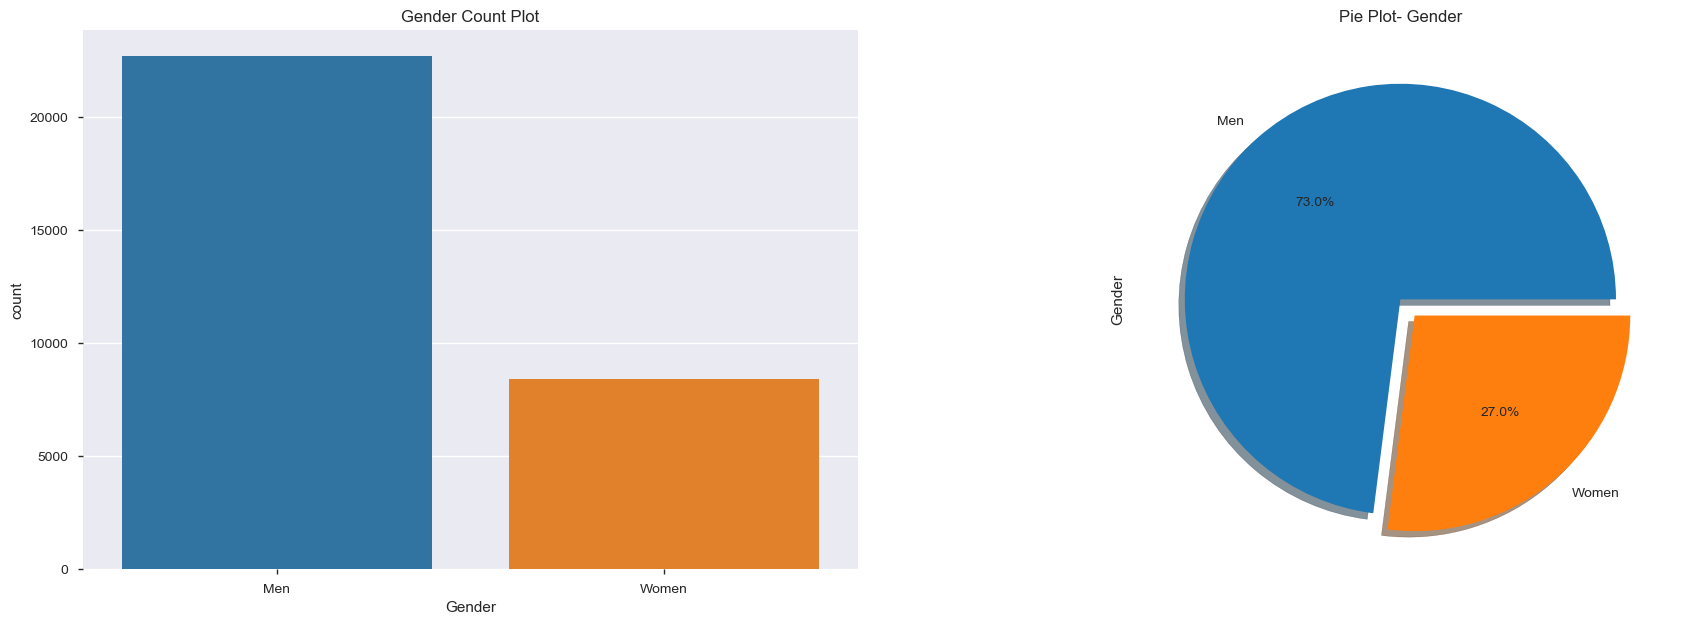

In [20]:
#sns.countplot(x='gender',data=oly_data).set_title('Gender Count')     #overall participation

f,ax = plt.subplots(1,2,figsize=(22,7))

sns.countplot(x='gender',ax=ax[0], data=oly_data).set_title('Gender Count Plot')
ax[0].set_xlabel('Gender')
ax[1].set_ylabel('Count')

oly_data['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True,explode=[0,0.1])
ax[1].set_title('Pie Plot- Gender')
ax[1].set_ylabel('Gender')

Since this dataset consists info of __only__ medal wons, the same has been considered for arriving at the count based on gender.

Count in numbers

In [21]:
oly_data['gender'].value_counts()

Men      22743
Women     8416
Name: gender, dtype: int64

It is observed that men have won more medals than women, which could also be due to less participation.

<a id=section402></a>
### 4.2 Over the years, how has been the trend in winning medals based on gender?

- Using countplot

Text(0.5, 1.0, 'Year wise Gender Count')

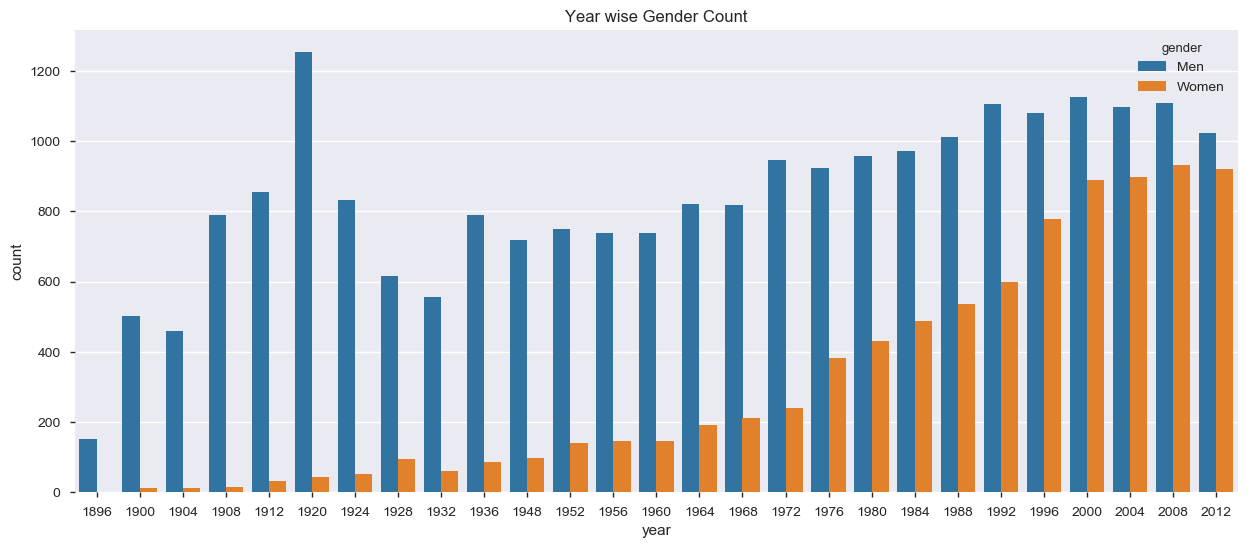

In [22]:
fig,ax=plt.subplots(figsize=(15,6))
sns.countplot(data=oly_data,ax=ax,x='year',hue='gender').set_title('Year wise Gender Count') # year wise gender count

- Using FacetGrid

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Gender distribution using FacetGrid')

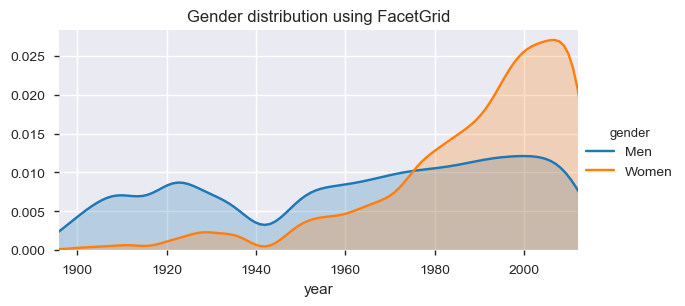

In [23]:
as_fig = sns.FacetGrid(oly_data,hue='gender',aspect=2)

as_fig.map(sns.kdeplot,'year',shade=True)


oldest = oly_data['year'].max()
as_fig.set(xlim=(1896,oldest))

as_fig.add_legend()
plt.title('Gender distribution using FacetGrid')

It is observed that in the initial years not much medals were won by women, could be due to less participation (this conclusion is arrived at, as the dataset __doesnot__ consist of the info of total participants). But women has been winning more medals as years passed by.

<a id=section403></a>
### 4.3 How is the performance of India against Top 5 countries?

To review the performance, dataset has been divided into __two categories__, Individual and Team events.

- Individual Category

In [24]:
#Dataframe of Top 5 countries along with India
Individual_Top5=pd.DataFrame( oly_data['country'][oly_data['eventtype'] == 'Individual'].value_counts().head(5)).append(\
pd.DataFrame(oly_data['country'][(oly_data['eventtype'] == 'Individual') & (oly_data['country'] == 'IND')].value_counts()))

In [25]:
#Renaming the columns
Individual_Top5.rename_axis('Country',inplace=True)
Individual_Top5.columns=['Count']
Individual_Top5.head(10) # Count includes Top 5 countries and that of India

,Count
Country,
USA,1943
URS,807
GBR,516
FRA,486
GER,406
IND,14


Text(0.5, 1.0, 'Performance of India Vs Top 5 Countries')

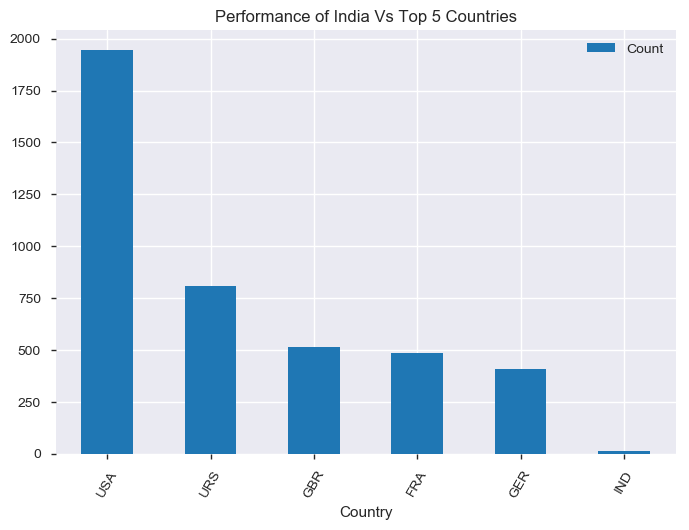

In [26]:
Individual_Top5.plot.bar(rot=60).set_title('Performance of India Vs Top 5 Countries')

- As a Team

In [27]:
#Derive distinct medal count when performed as Team
Team_Data=oly_data[['year','sport','country','gender','medal','eventtype']][oly_data['eventtype'] == 'Team'].drop_duplicates()

In [28]:
#Top 5 countries
Team_Top5=pd.DataFrame(Team_Data['country'][Team_Data['eventtype'] == 'Team'].value_counts().head(5)).append(\
pd.DataFrame(Team_Data['country'][(Team_Data['eventtype'] == 'Team') & (Team_Data['country'] == 'IND')].value_counts()))

In [29]:
#Renaming the columns
Team_Top5.rename_axis('Country',inplace=True)
Team_Top5.columns=['Count']
Team_Top5

,Count
Country,
USA,380
GBR,244
URS,179
FRA,172
GER,157
IND,12


Text(0.5, 1.0, 'Performance of India Vs Top 5 Countries')

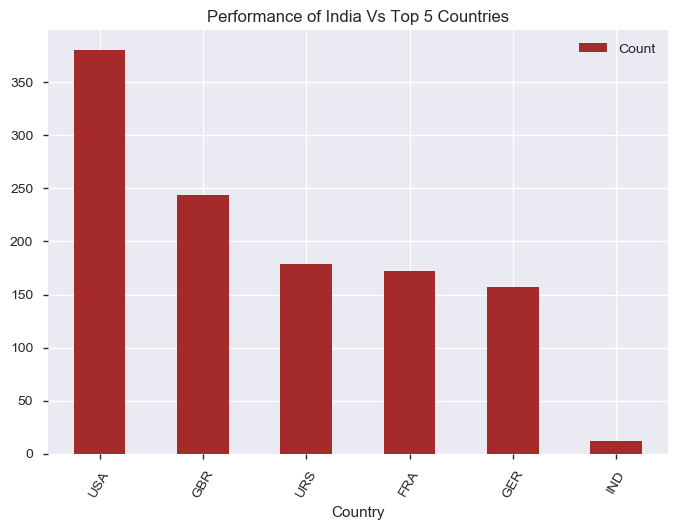

In [30]:
Team_Top5.plot.bar(rot=60,color='brown').set_title('Performance of India Vs Top 5 Countries')

It is observed that India's performance is __low__ compared to the other Top 5 countries, whether it be in individual or team events.

<a id=section404></a>
### 4.4 Is India one among the bottom 5 performers?

To review the performance, dataset has been divided into __two categories__, Individual and Team events.

- Individual Event

In [31]:
#Dataframe of bottom 5 countries and India
Individual_Bot5=pd.DataFrame( oly_data['country'][oly_data['eventtype'] == 'Individual'].value_counts().tail(5)).append(\
pd.DataFrame(oly_data['country'][(oly_data['eventtype'] == 'Individual') & (oly_data['country'] == 'IND')].value_counts()))

In [32]:
#Renaming the columns
Individual_Bot5.rename_axis('Country',inplace=True)
Individual_Bot5.columns=['Count']
Individual_Bot5.head(10) # Count includes Top 5 countries and that of India

,Count
Country,
HAI,1
GUY,1
SEN,1
TOG,1
CIV,1
IND,14


Text(0.5, 1.0, 'Performance of India Vs Bottom 5 Countries')

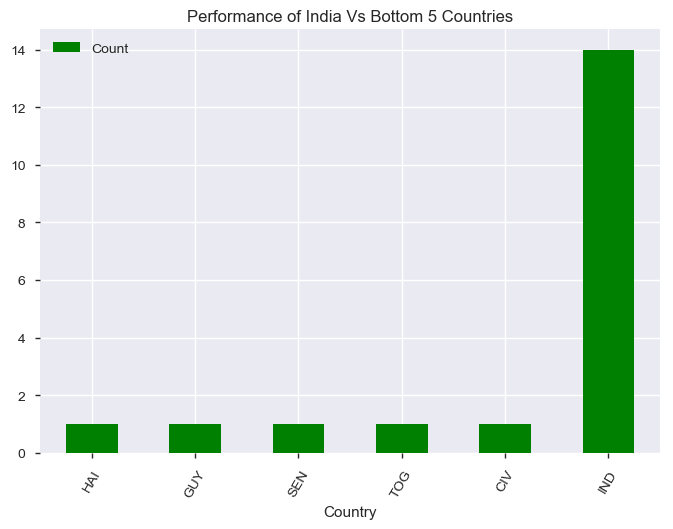

In [33]:
Individual_Bot5.plot.bar(rot=60,color='green').set_title('Performance of India Vs Bottom 5 Countries')

- Team Event

In [34]:
#Bottom 5 countries
Team_Bot5=pd.DataFrame(Team_Data['country'][Team_Data['eventtype'] == 'Team'].value_counts().tail(5)).append(\
pd.DataFrame(Team_Data['country'][(Team_Data['eventtype'] == 'Team') & (Team_Data['country'] == 'IND')].value_counts()))

In [35]:
#Renaming the columns
Team_Bot5.rename_axis('Country',inplace=True)
Team_Bot5.columns=['Count']
Team_Bot5

,Count
Country,
ISV,1
KSA,1
CMR,1
HAI,1
SIN,1
IND,12


Text(0.5, 1.0, 'Performance of India Vs Bottom 5 Countries')

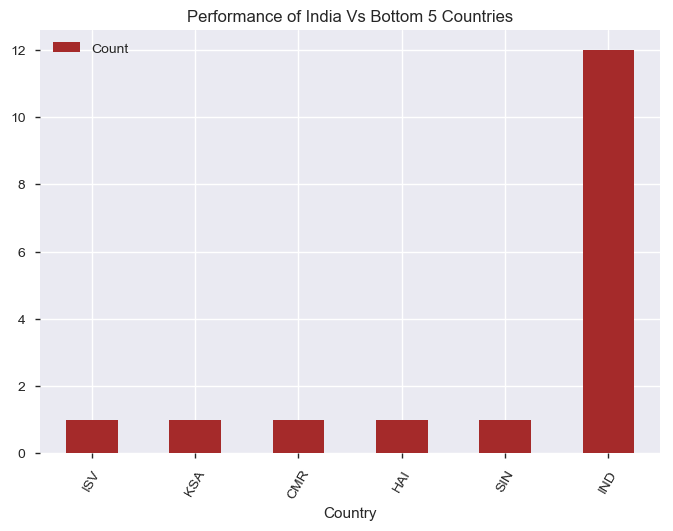

In [36]:
Team_Bot5.plot.bar(rot=60,color='brown').set_title('Performance of India Vs Bottom 5 Countries')

India's performance is __much better__ than the bottom 5 countries in both __Individual__ and __Team__ events, and is certainly not one among the bottom five.

<a id=section405></a>
### 4.5 What has been the position of India in the medals table over the years?

In [37]:
dfPOS=oly_data[['year','sport','country','gender','medal','eventtype']][oly_data['eventtype'] == 'Individual'].append(Team_Data)

In [38]:
# Get the count of medals won based on year,country,medal type
dfPOSTemp = dfPOS.groupby(['year','country','medal']).agg({'medal':"count"})

In [39]:
dfPOSTemp.columns=['count']           #Rename the aggregate column

In [40]:
dfPOSTemp.head()

count
year country medal        
1896 AUS     Gold        2
     AUT     Bronze      2
             Gold        2
             Silver      1
     DEN     Bronze      3

In [41]:
#Using pivot_table make the medal types as column
dfFinal = pd.pivot_table(dfPOSTemp, values='count', index=['year', 'country'],columns=['medal'], aggfunc=np.sum)

In [42]:
dfFinal.head()
dfFinal.fillna(0,inplace=True)
dfFinal['Bronze']=dfFinal['Bronze'].astype('int')
dfFinal['Gold']=dfFinal['Gold'].astype('int')
dfFinal['Silver']=dfFinal['Silver'].astype('int')
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1157 entries, (1896, AUS) to (2012, VEN)
Data columns (total 3 columns):
Bronze    1157 non-null int32
Gold      1157 non-null int32
Silver    1157 non-null int32
dtypes: int32(3)
memory usage: 18.4+ KB


In [43]:
dfFinal.head()
#dfFinal.rename_axis('index',inplace=True)
dfFinal.rename_axis('',axis=1,inplace=True)

In [44]:
#To define RANK of the row based on multiple columns
col2 = dfFinal["Gold"].astype(str)
col3=dfFinal["Silver"].astype(str)
col4=dfFinal["Bronze"].astype(str)
dfFinal['Concat']=(col2+col3+col4).astype(int)
dfFinal['Rank'] = dfFinal.groupby(by=['year'])['Concat'].rank(method='dense',ascending=False).astype(int)

In [45]:

dfFinal.reset_index(['year','country'],inplace=True)
dfFinal.head()

,year,country,Bronze,Gold,Silver,Concat,Rank
0,1896,AUS,0,2,0,200,8
1,1896,AUT,2,2,1,212,7
2,1896,DEN,3,1,2,123,9
3,1896,FRA,2,5,4,542,4
4,1896,GBR,2,2,3,232,5


Text(0.5, 1.0, 'Rank in the Medal Table')

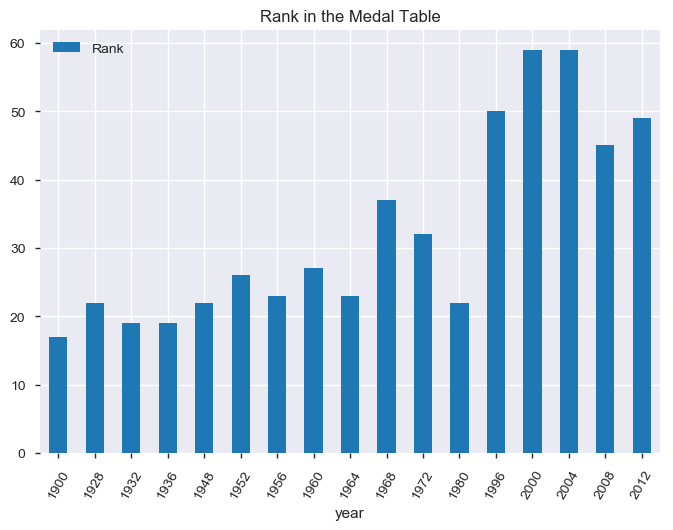

In [57]:
dfFinal[['year','country','Rank']].loc[dfFinal.country=='IND'].plot.bar(x='year',rot=60).set_title("Rank in the Medal Table")


India's __rank__ in the Olympics is not steady. When compared to the other countries it has been under performing.

<a id=section406></a>
### 4.6 Performance of India in the olympics

- Considering overall medals won

In [47]:
Ind_Team=oly_data[['year','sport','country','gender','medal','eventtype']][(oly_data['eventtype'] == 'Team') &(oly_data['country'] == 'IND')].drop_duplicates()

In [48]:
Ind_Indiv=oly_data[['year','sport','country','gender','medal','eventtype']][(oly_data['eventtype'] == 'Individual') &(oly_data['country'] == 'IND')]

In [49]:
Ind_all=Ind_Team.append(Ind_Indiv)
Ind_Medal=pd.DataFrame(Ind_all[['year','medal']].groupby('year').size())

In [50]:
Ind_Medal.columns=['Count']   #Renaming the column

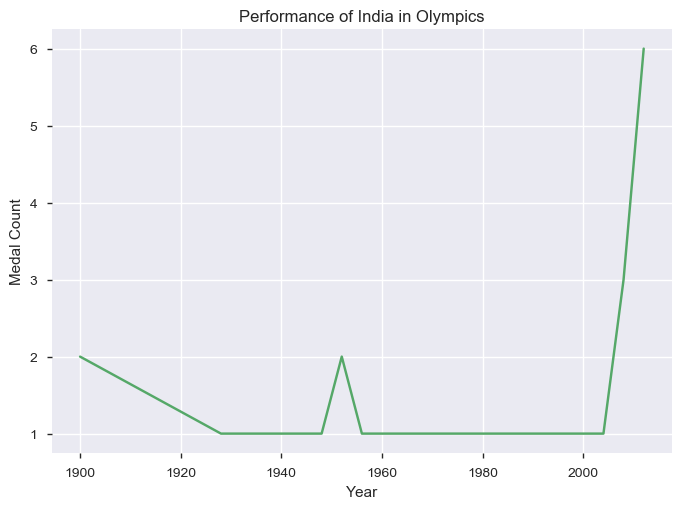

In [51]:
plt.plot(Ind_Medal.index, Ind_Medal.Count, color='g')

plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.title('Performance of India in Olympics')
plt.show()

- Grouped by Medals

Text(0.5, 1.0, 'Medals won by India')

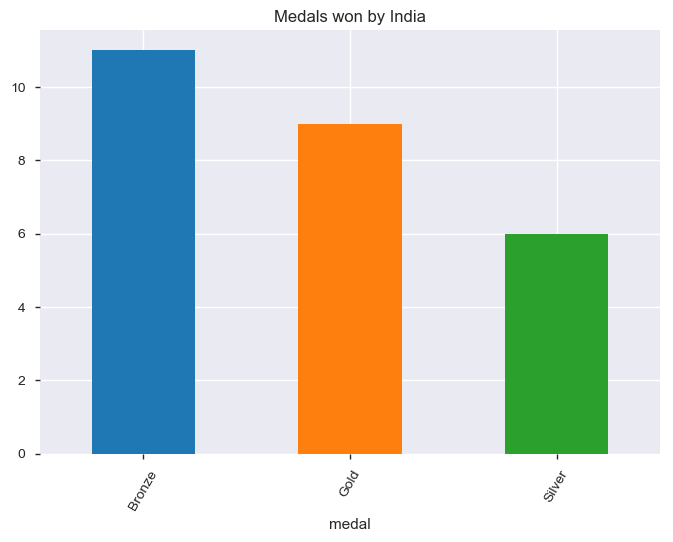

In [52]:
#Medals Won By India
Ind_all.groupby('medal').size().plot.bar(rot=60).set_title('Medals won by India')


In [53]:
Ind_all.groupby('medal').size() # count based on medals

medal
Bronze    11
Gold       9
Silver     6
dtype: int64

- Individual Vs as Team

Text(0, 0.5, 'Number of Medals')

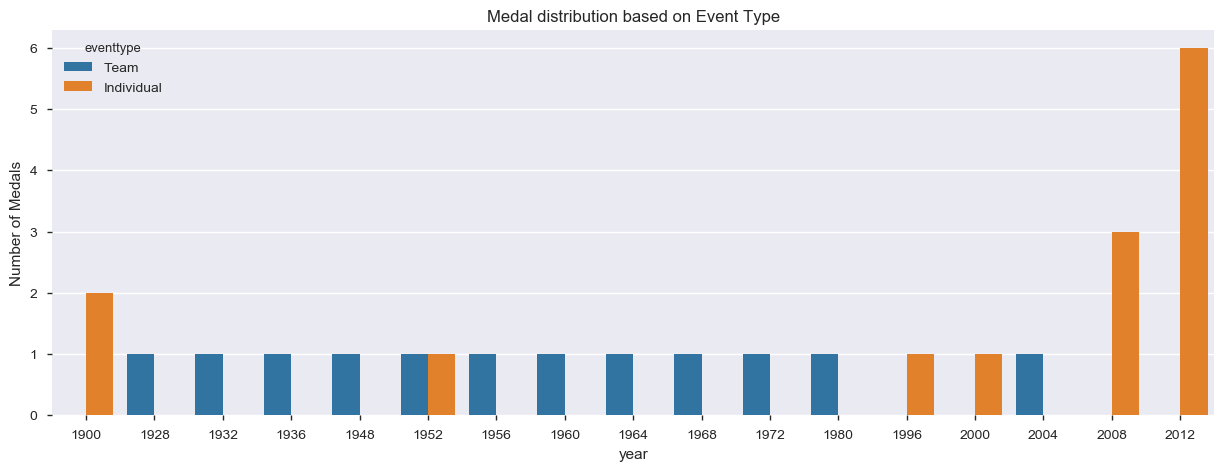

In [54]:
f,ax = plt.subplots(figsize=(15,5))


sns.countplot(x='year',ax=ax, data=Ind_all, hue='eventtype').set_title('Medal distribution based on Event Type')

plt.ylabel('Number of Medals')

It is observed that India's overall performance in __Individual__ and __Team__ events are almost the same, but in later years individuals are performing well.

- Gender wise evaluation based on __event Type__

Text(0.5, 1.0, 'Gender Count')

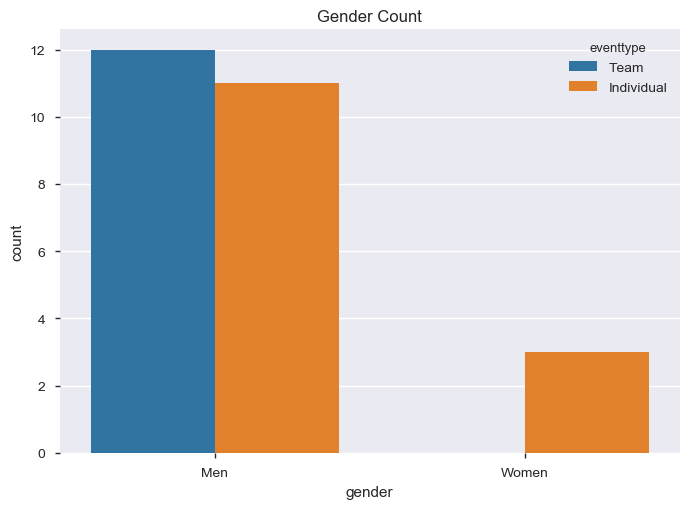

In [55]:
sns.countplot(x='gender',data=Ind_all,hue='eventtype').set_title('Gender Count')     

It is observed that men's performance on the whole is better than women's. Also women have contributed only in __Individual__ events.

- Sports category

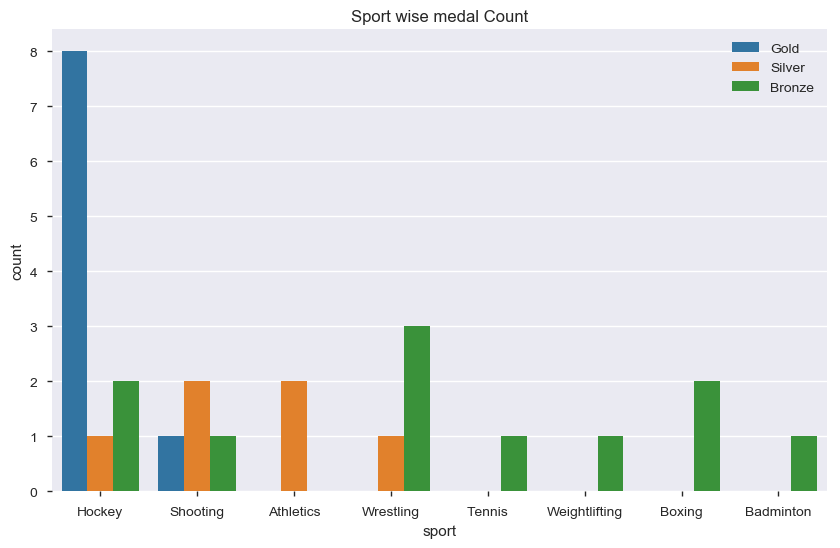

In [56]:
#Ind_all.head(50)
f,ax = plt.subplots(figsize=(10,6))

sns.countplot(x='sport',data=Ind_all,hue='medal',orient='h').set_title('Sport wise medal Count') 
plt.legend(loc='upper right')

<a id=section5></a>
## 5. Conclusions



- The analysis helped us to know the __performance__ of men and women in the Olympics.(__From: Section 4.1__)
- In the initial years, participation of women was less which increased gradually over the years. (__From: Section 4.2__)
- The overall performance of __India__ as against the __top 5__ countries was too low.(__From: Section 4.3__)
- When looked at the performance of __India individually__,(__From: Section 4.6__) <br/>
  - Men have bagged more medals than women.
  - Performance in __individual__ and __team__ events are almost the same.
  - Hockey is the only __team__ events where medals have been won.
- Overall India needs more skill and the players need to practice more to enhance themselves in upcoming Olympics.(__From: Section 4.3, 4.4, 4.5, 4.6__)
- Also the contribution of women in Olympics have to be encouraged.(__From: Section 4.1, 4.2, 4.6__)